In [12]:
import numpy as np

filename = "dataset/trainData.txt"

numFeatures = 6

In [13]:
def loadDataSet(path):
    rawData = np.genfromtxt(path, delimiter=',', dtype = "str")

    #extract the 6 feature for each footprint
    features = rawData[:, 0:numFeatures]
    features = np.array(features, dtype= np.float64).T

    #extract the labels: 1->True, 0->False
    labels = rawData[:, -1]
    labels = np.array(labels, dtype=np.int16)

    return features, labels



In [14]:
features, labels = loadDataSet(filename)

print(f"features shape: {features.shape}\nLabels shape: {labels.shape}")

features shape: (6, 6000)
Labels shape: (6000,)


features: columns are samples, rows are the 6 features

In [15]:
features[:, :10] #feature 0 to 5, first 10 samples

array([[ 1.85284048, -0.21530775,  0.04653456, -0.69846824, -2.13449634,
        -0.18678977,  0.37954862,  0.25194121,  1.02611325,  0.12159774],
       [-0.16436898,  1.63665974, -1.16487257, -0.7313877 , -0.94679643,
        -0.35105166,  0.07035488, -0.536285  ,  0.84958757, -0.44862065],
       [ 1.09839078, -0.61831145,  0.04392191,  0.22682514,  0.7331265 ,
         0.25874009,  0.74192792,  0.98317697, -0.34210771, -0.26330183],
       [-0.93073689,  0.99002204, -0.41369086,  0.1487948 , -3.50433306,
         0.82430276,  0.21831212, -1.43683554,  0.84965311, -0.31580565],
       [-1.0193342 ,  0.38670252, -1.08847926, -1.44462156, -1.82338742,
        -1.24295012,  1.30277214,  0.74408647,  0.12493949,  1.42245348],
       [ 1.16696309,  1.15926273, -1.37988988,  1.17573859,  0.90464917,
        -0.09511962, -1.32719263,  1.43401058,  0.69336959, -1.00038176]])

## Features normalization 

In [16]:
#Compute mean
mu = features.mean(axis=1) #shape is (6, )

print(f"Mu before reshaping: {mu}\n")
#Reshape the mean to subtract it to the features
mu = mu.reshape((mu.shape[0], 1))   #(6, 1)

print(f"Mu after reshaping:\n {mu}\n")

Mu before reshaping: [ 0.00170711  0.00503903 -0.00560753  0.00109537 -0.00700025  0.00910515]

Mu after reshaping:
 [[ 0.00170711]
 [ 0.00503903]
 [-0.00560753]
 [ 0.00109537]
 [-0.00700025]
 [ 0.00910515]]



In [17]:
#Std Dev
std = features.std(1)

std.shape

(6,)

In [18]:
print(f"Features shape: {features.shape}\nMu shape: {mu.shape}\nStd shape: {std.shape}")

Features shape: (6, 6000)
Mu shape: (6, 1)
Std shape: (6,)


In [19]:
#I have to reshape the std!
std = std.reshape((std.shape[0], 1))
std.shape

(6, 1)

In [20]:
#Normalization

normalizedFeatures = (features - mu) / std

print(f"Shape of normaliized features: {normalizedFeatures.shape}\nShape of original features:{features.shape}")
print(f"Mean:\n {mu}\n Std:\n {std}")


#show all the 6 features for sample 0, before and after normalzation
print(f"features, sample0 before norm: {features[:, 0]}\nfeature, sample0 after norm: {normalizedFeatures[:, 0]}") 

Shape of normaliized features: (6, 6000)
Shape of original features:(6, 6000)
Mean:
 [[ 0.00170711]
 [ 0.00503903]
 [-0.00560753]
 [ 0.00109537]
 [-0.00700025]
 [ 0.00910515]]
 Std:
 [[1.00067129]
 [0.99917601]
 [1.00124013]
 [0.99513511]
 [1.00059856]
 [0.99861091]]
features, sample0 before norm: [ 1.85284048 -0.16436898  1.09839078 -0.93073689 -1.0193342   1.16696309]
feature, sample0 after norm: [ 1.84989155 -0.16954771  1.1026309  -0.93638768 -1.01172838  1.15946855]


## Normalized, density histrograms

In [21]:
labels

array([1, 0, 1, ..., 1, 0, 0], shape=(6000,), dtype=int16)

In [22]:
import matplotlib.pyplot as plt

def densityFeaturePlots(x, y):
    labelColors = {0: "red", 1: "#00ff00"}
    classLabels = {0: 'False', 1: 'True'}

    for i in range(numFeatures):
        plt.figure(figsize=(6,4))
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]  #select for feature i all the samples with class == label
            
            plt.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, linewidth = 0.3, density=True, label=f"{classLabels[label]}", edgecolor="black", bins=100)
            plt.legend()  # legend

        plt.title(f"Feature {i} Distribution")
        plt.xlabel(f"Feature {i}")
        plt.ylabel("Density")
        plt.show()

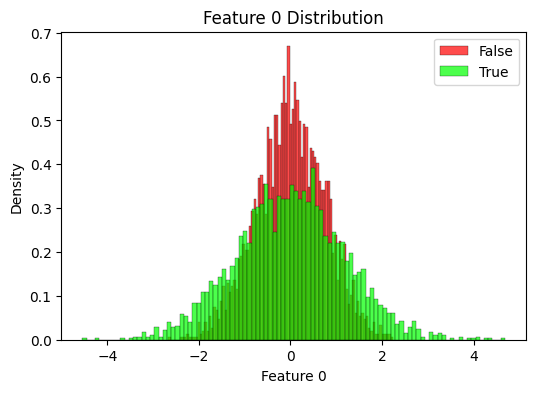

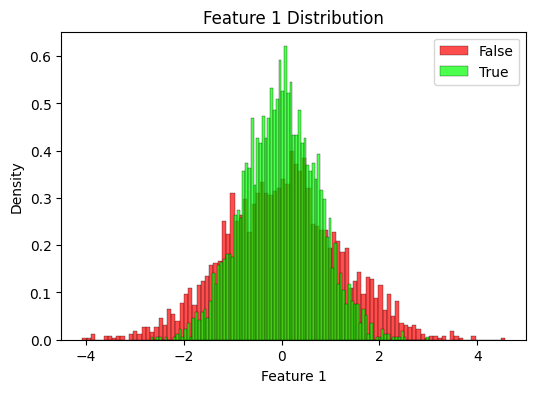

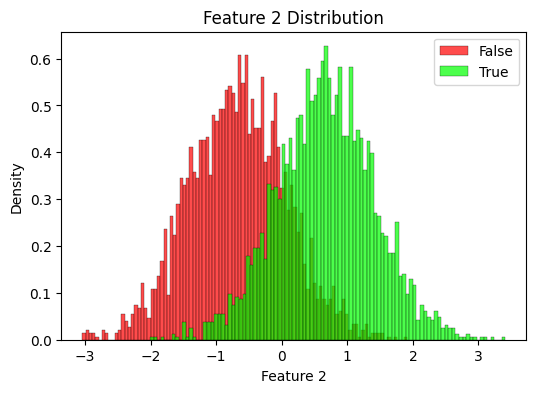

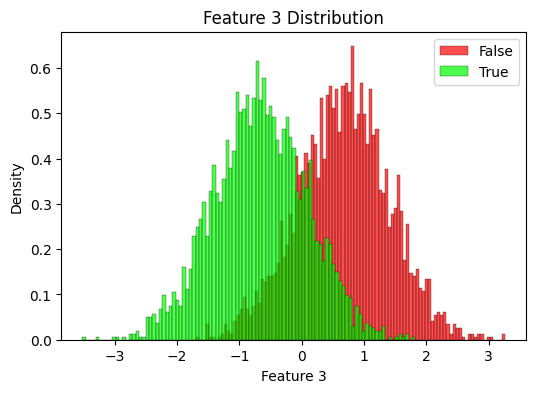

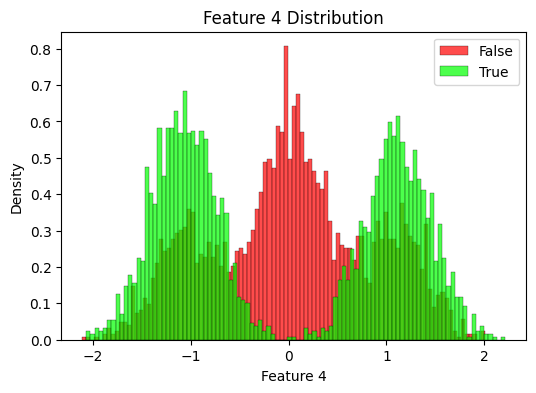

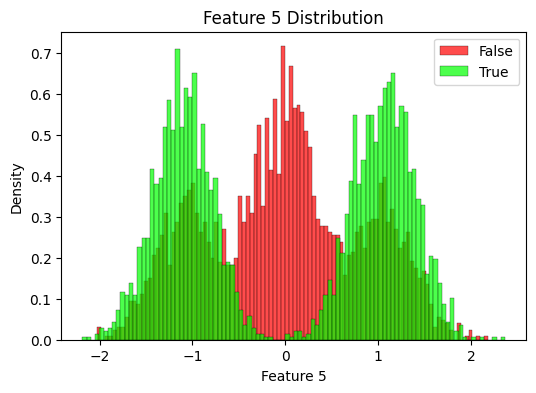

In [23]:
#Plot histograms
x = normalizedFeatures
y = labels
densityFeaturePlots(x, y)

## Scatter plots of pair of features

In [24]:
def scatterPlots(x, y):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 6
    rows = 6

    labelColors = {0: "red", 1: "#00ff00"}
    classLabels = {0: 'False', 1: 'True'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(numFeatures):
        for j in range(numFeatures):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.4,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(f"Feature {i}")
            subplot.set_ylabel(f"Feature {j}")
            subplot.legend()
            subplot.set_title(f"Scatter plot: Feature {i} vs Feature {j}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {i} Distribution")
            subplot.set_xlabel(f"Feature {i}")
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

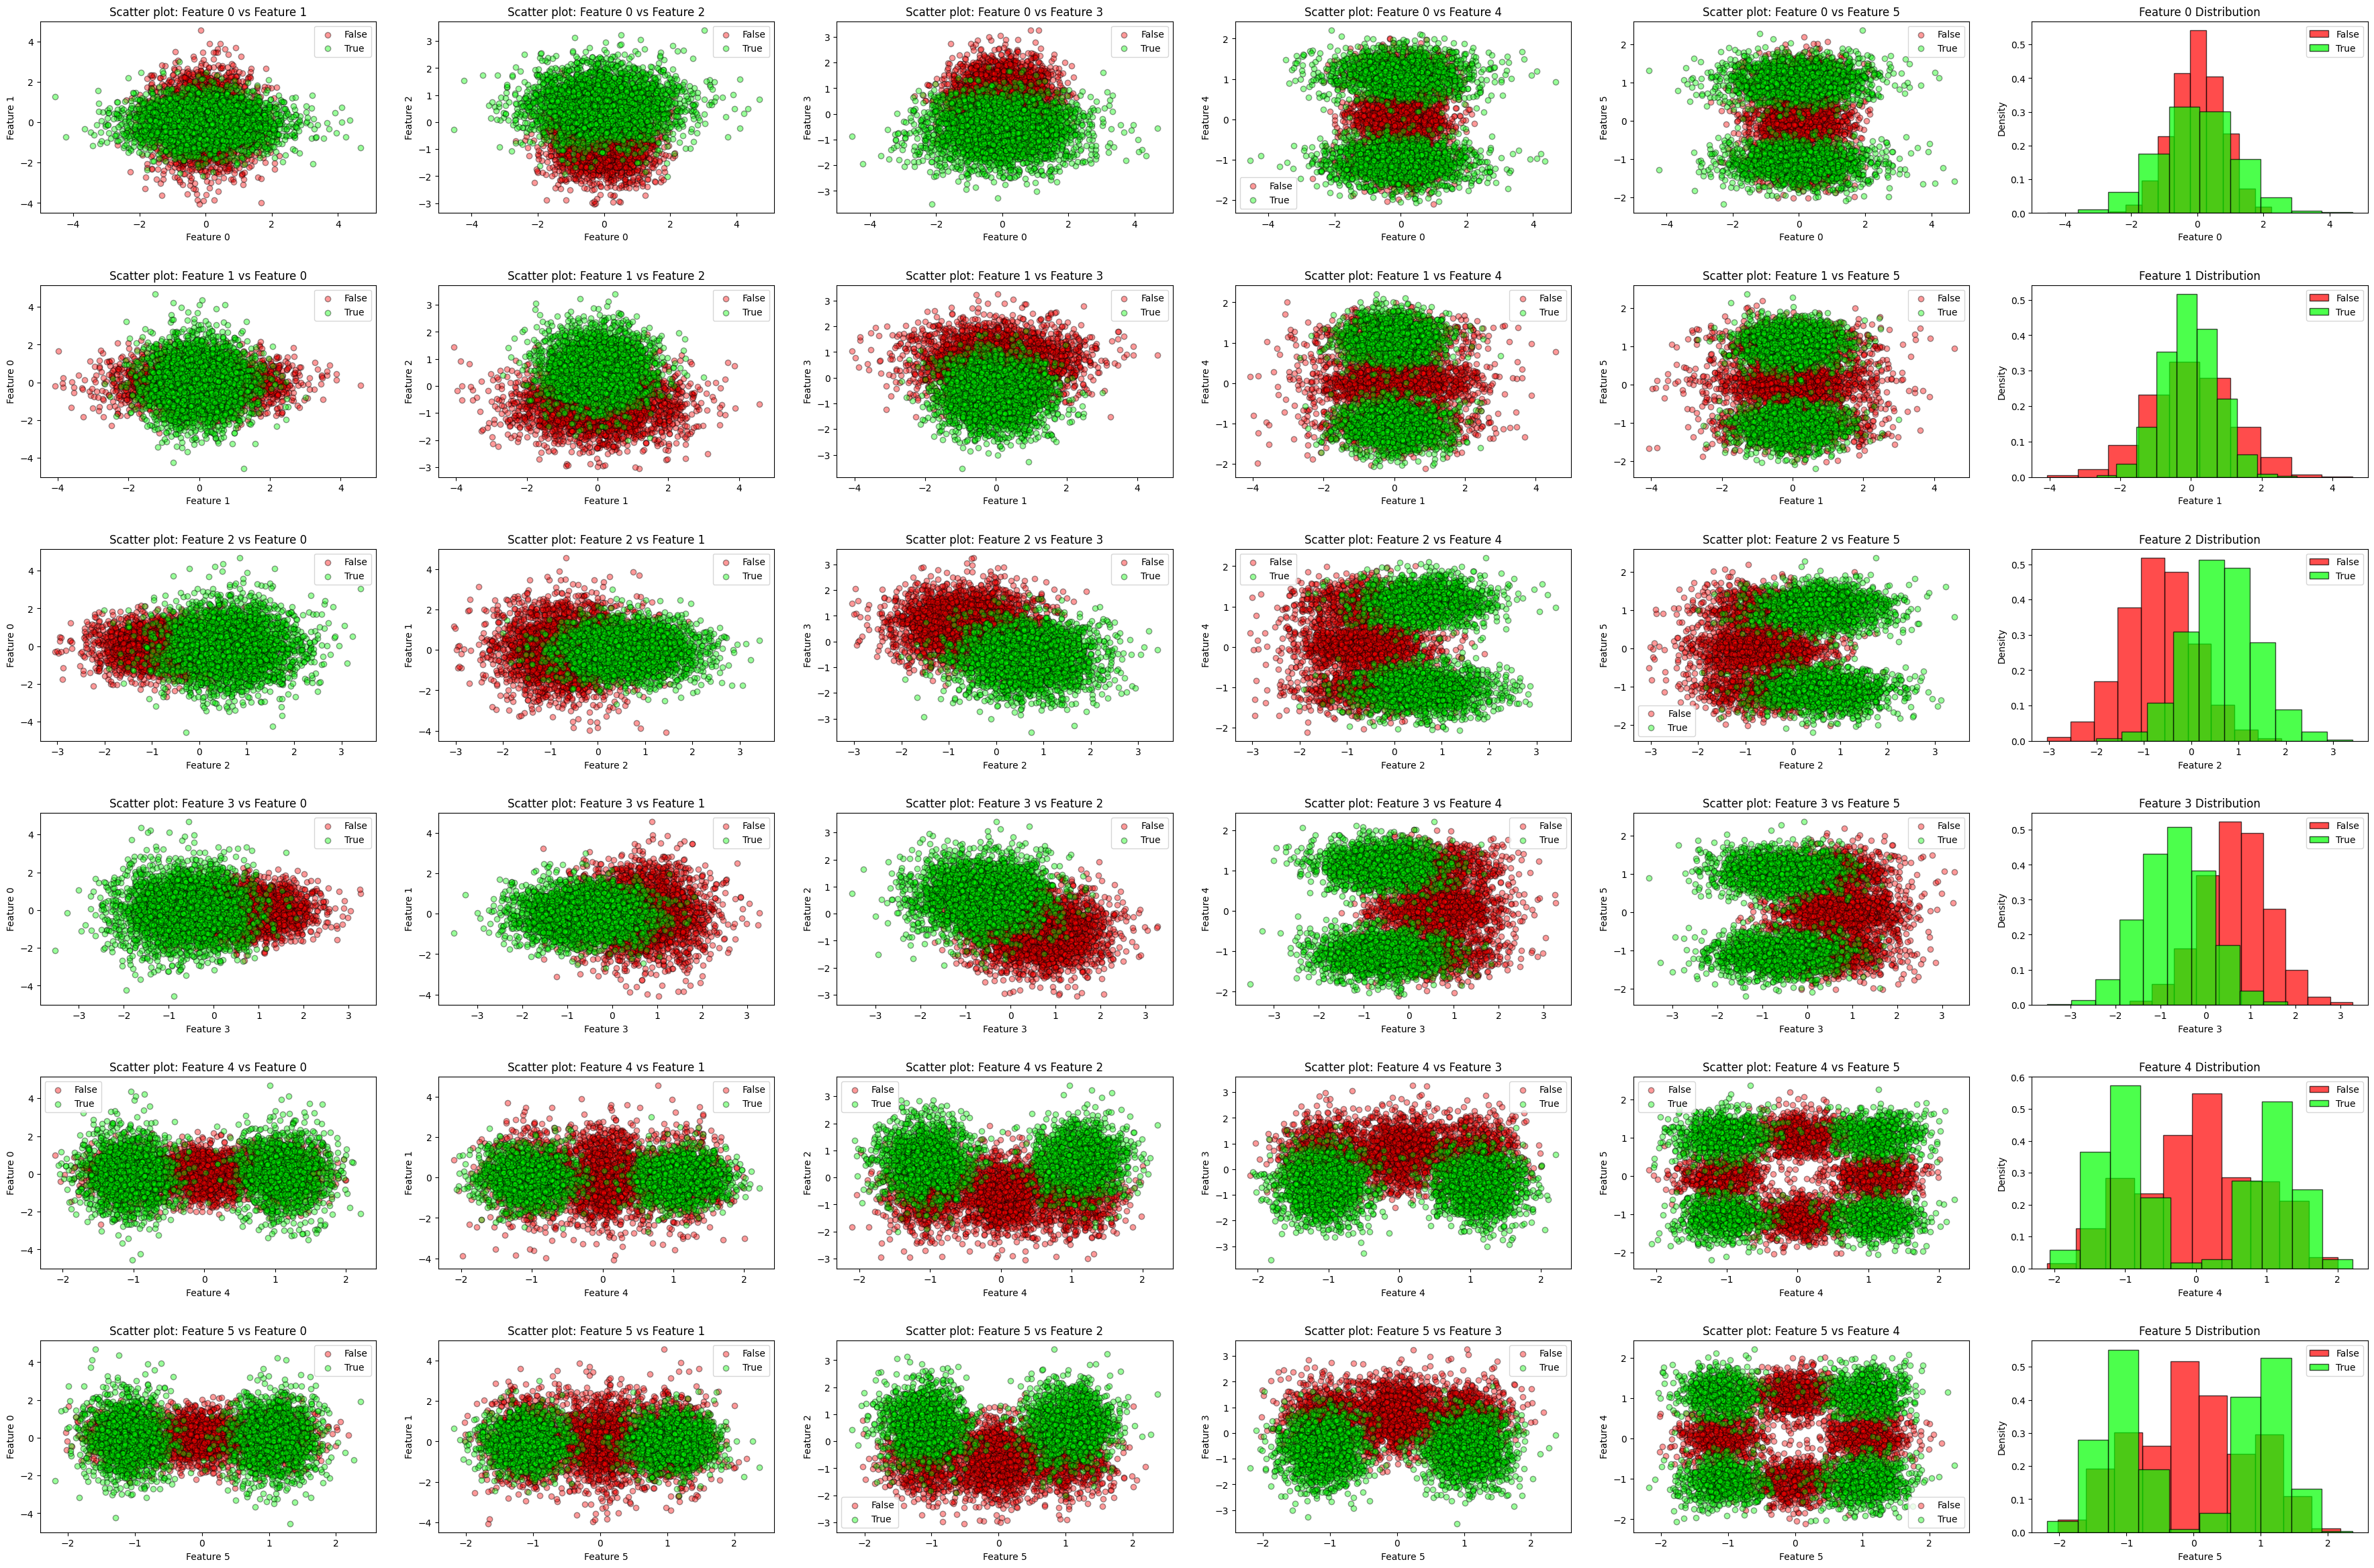

In [25]:
scatterPlots(x, y)

## Correlation between the first 2 features

In [26]:
def scatterPlotsFirst2Features(x, y):
    #I select feature i and feature j, with i different from j and plot them on the 2 axis of every scatter plot chart

    #rows, cols for making the subplot
    cols = 2
    rows = 2

    labelColors = {0: "red", 1: "#00ff00"}
    classLabels = {0: 'False', 1: 'True'}

    #subplot creation
    fig, plots = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
    plots = plots.flatten()   #the 2D axes array becomes a 1D array in order to access each ax in a more straighforward way during the loop

    subplotCounter = 0
    for i in range(2):
        for j in range(2):
            if j == i: continue

            #choose the subplot
            subplot = plots[subplotCounter]
            subplotCounter+=1

            #plt.scatter accepts x and y vectors
            for label in labelColors:
                xFeature = x[i][ y == label]
                yFeature = x[j][ y == label]
                subplot.scatter(xFeature, yFeature, color= labelColors[label], alpha=0.4,  label=f"{classLabels[label]}", edgecolor="black")

            subplot.set_xlabel(f"Feature {i}")
            subplot.set_ylabel(f"Feature {j}")
            subplot.legend()
            subplot.set_title(f"Scatter plot: Feature {i} vs Feature {j}")

        subplot = plots[subplotCounter]
        subplotCounter+=1
        for label in labelColors:
            sample_with_that_class = x[i][ y == label]
            subplot.hist(x=sample_with_that_class, color=labelColors[label], alpha= 0.7, density=True, label=f"{classLabels[label]}", edgecolor="black")
            subplot.legend()
            subplot.set_title(f"Feature {i} Distribution")
            subplot.set_xlabel(f"Feature {i}")
            subplot.set_ylabel("Density")

    plt.tight_layout(pad=3) #add padding between subplots to distance between eachother
    plt.show()

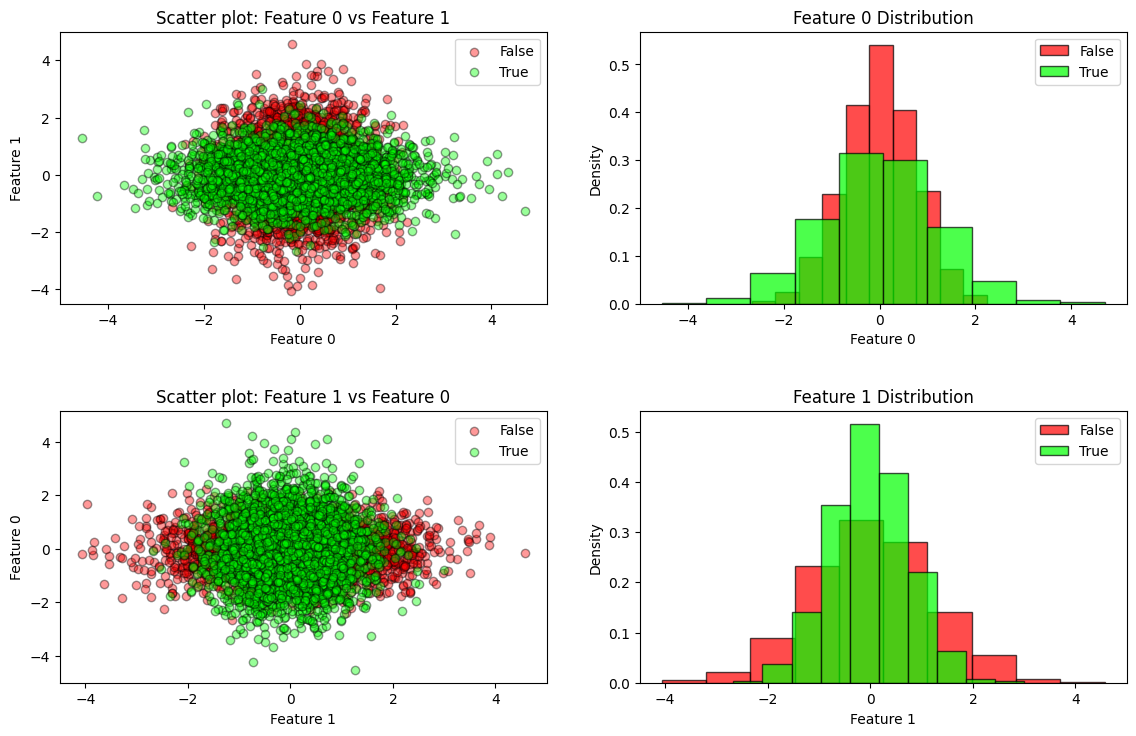

In [27]:
scatterPlotsFirst2Features(x, y)

## Difference between Covariance Matrix and Correlation Matrix
The Covariance Matrix is calculated as: <br> ```Cov = (features @ features.T) / float(features.shape[1])``` <br> because the features are **not** normalized <br>
The Correlation Matrix is calculated as: <br> ```Corr = (normalizedFeatures @ normalizedFeatures.T) / float(normalizedFeatures.shape[1])``` <br> Here the features are **normalized**!

In [ ]:
# Correlation Matrix with the mathematical formula
C = (normalizedFeatures @ normalizedFeatures.T) / float(normalizedFeatures.shape[1])
C

array([[ 1.00000000e+00,  5.16835023e-03,  1.76409036e-03,
         1.45880999e-02,  9.99398418e-03, -1.29684448e-02],
       [ 5.16835023e-03,  1.00000000e+00, -1.58288429e-02,
        -4.43169641e-04, -4.01398004e-03, -8.19499783e-04],
       [ 1.76409036e-03, -1.58288429e-02,  1.00000000e+00,
        -4.38653039e-01, -2.68107430e-02,  6.34484112e-03],
       [ 1.45880999e-02, -4.43169641e-04, -4.38653039e-01,
         1.00000000e+00,  2.54443716e-02,  8.32128708e-03],
       [ 9.99398418e-03, -4.01398004e-03, -2.68107430e-02,
         2.54443716e-02,  1.00000000e+00,  8.76486713e-04],
       [-1.29684448e-02, -8.19499783e-04,  6.34484112e-03,
         8.32128708e-03,  8.76486713e-04,  1.00000000e+00]])

In [29]:
Corr = np.corrcoef(features, rowvar=True)
Corr

array([[ 1.00000000e+00,  5.16835023e-03,  1.76409036e-03,
         1.45880999e-02,  9.99398418e-03, -1.29684448e-02],
       [ 5.16835023e-03,  1.00000000e+00, -1.58288429e-02,
        -4.43169641e-04, -4.01398004e-03, -8.19499783e-04],
       [ 1.76409036e-03, -1.58288429e-02,  1.00000000e+00,
        -4.38653039e-01, -2.68107430e-02,  6.34484112e-03],
       [ 1.45880999e-02, -4.43169641e-04, -4.38653039e-01,
         1.00000000e+00,  2.54443716e-02,  8.32128708e-03],
       [ 9.99398418e-03, -4.01398004e-03, -2.68107430e-02,
         2.54443716e-02,  1.00000000e+00,  8.76486713e-04],
       [-1.29684448e-02, -8.19499783e-04,  6.34484112e-03,
         8.32128708e-03,  8.76486713e-04,  1.00000000e+00]])

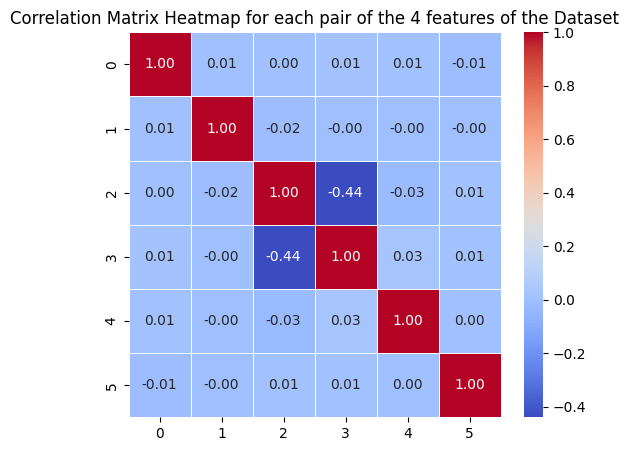

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title(f"Correlation Matrix Heatmap for each pair of the {numFeatures} features of the Dataset")
plt.show()

## Variance calculation

In [49]:
feature0_classFalse = normalizedFeatures[0, labels == 0]
feature0_classTrue = normalizedFeatures[0, labels == 1]


print(f"feature0, class false shape: {feature0_classFalse.shape}")
print(f"feature0, class True shape: {feature0_classTrue.shape}")


#Variance for feature0, class True
var0_classFalse = feature0_classFalse.var(0)    #since it's a row vector, writing var(0) is the same as writing var()
var0_classTrue = feature0_classTrue.var(0)


print(f"var feature0 class False: {var0_classFalse}")
print(f"var feature0 class True: {var0_classTrue}")

feature0, class false shape: (2990,)
feature0, class True shape: (3010,)
var feature0 class False: 0.5688171125890537
var feature0 class True: 1.4283151763451152


<ul>
<li> Variance for class False is way smaller because (you can see it on the density histogram!) there's a big part of samples located near the mean (the density in the histogram is the highest) and the tails have lower density. 

<li> Variance for class True is higher because there are fewer samples located near the mean and the tails have higher density.

<ul>

In [53]:
normalizedFeatures[0, labels == 0]

array([-0.21686927, -0.18837042,  1.02371893, ..., -0.67053919,
        1.06423207, -0.47325404], shape=(2990,))

In [55]:
labels==0

array([False,  True, False, ..., False,  True,  True], shape=(6000,))

In [54]:
normalizedFeatures[1, labels == 0]

array([ 1.63296626, -0.35638435,  0.84524502, ...,  1.20630454,
        3.27483355, -0.37653917], shape=(2990,))

In [58]:
def showVariancesForFeaturesByClass():

    for i in range(numFeatures):
        featFalse = normalizedFeatures[i, labels == 0]
        featTrue = normalizedFeatures[i, labels == 1]


        print(f"feature {i}, class False shape: {featFalse.shape}")
        print(f"feature {i}, class True shape: {featTrue.shape}")


        #Variance for feature0, class True
        varFalse = featFalse.var(0)    #since it's a row vector, writing var(0) is the same as writing var()
        varTrue = featTrue.var(0)


        print(f"var feature {i} class False: {varFalse}")
        print(f"var feature {i} class True: {varTrue}")

        print("---"*20)
        print("\n")

In [59]:
showVariancesForFeaturesByClass()

feature 0, class False shape: (2990,)
feature 0, class True shape: (3010,)
var feature 0 class False: 0.5688171125890537
var feature 0 class True: 1.4283151763451152
------------------------------------------------------------


feature 1, class False shape: (2990,)
feature 1, class True shape: (3010,)
var feature 1 class False: 1.4232101676778883
var feature 1 class True: 0.5792320885271494
------------------------------------------------------------


feature 2, class False shape: (2990,)
feature 2, class True shape: (3010,)
var feature 2 class False: 0.5486154735297931
var feature 2 class True: 0.5475437130963902
------------------------------------------------------------


feature 3, class False shape: (2990,)
feature 3, class True shape: (3010,)
var feature 3 class False: 0.5412965429837056
var feature 3 class True: 0.5587661935678022
------------------------------------------------------------


feature 4, class False shape: (2990,)
feature 4, class True shape: (3010,)
var featu

In [63]:
def showVariancesForFeaturesByClass_Table(feature, labels):
    numFeatures = feature.shape[0]  # Numero di feature
    
    # Creiamo una lista per i dati della tabella
    table_data = []

    for i in range(numFeatures):
        featFalse = feature[i, labels == 0]
        featTrue = feature[i, labels == 1]

        varFalse = featFalse.var(0)
        varTrue = featTrue.var(0)

        # Aggiungiamo i dati alla lista
        table_data.append([f"Feature {i}", f"{varFalse:.4f}", f"{varTrue:.4f}"])

    # Creiamo la figura
    fig, ax = plt.subplots(figsize=(6, numFeatures // 2 + 1))
    ax.axis("tight")
    ax.axis("off")

    # Creiamo la tabella
    col_labels = ["Feature", "Var (False)", "Var (True)"]
    table = ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')

    # Renderizziamo la tabella
    plt.show()


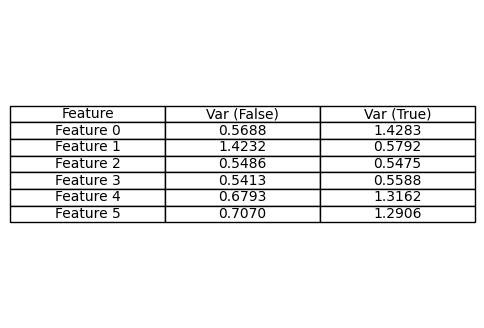

In [64]:
showVariancesForFeaturesByClass_Table(normalizedFeatures, labels)

### Comment on Variances
<ul>

<li> For feature 0: 

<li> For feature 1: Var (False) >> Var (True) because False samples are more concentrated around the mean and the tails have lower densities, whereas True samples are more sparse and less concentrated around the mean.
<li> For feature 2: Var(True) == Var(False) ca because both class samples are distributed in a similar way and are sparse in about the same way. Maybe the feature is not discriminant because its distribution doens't change too much between the 2 different classes??
<li> For feature 3: it's pretty much the same as feature 2.
<li> For feature 4 and 5: Var (True) and Var (False) are very different 

</ul>